In [11]:
library(tidyverse)
library(RColorBrewer)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [6]:
sws_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.switzerland.data"
clv_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.cleveland.data"
hgr_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.hungarian.data"
vlb_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.va.data"

cols <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
na_vals <- c("", "NA", "?")

sws <- read_csv(sws_url, col_names = cols, na = na_vals) |> 
mutate(location = "Switzerland")
clv <- read_csv(clv_url, col_names = cols, na = na_vals) |> 
mutate(location = "Cleveland")
hgr <- read_csv(hgr_url, col_names = cols, na = na_vals) |> 
mutate(location = "Hungary")
vlb <- read_csv(vlb_url, col_names = cols, na = na_vals) |> 
mutate(location = "VA Long Beach")

heart_disease_data <- bind_rows(sws, clv, hgr, vlb) 
heart_disease_data

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column ty

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
36,1,4,110,0,NA,0,125,1,1.0,2,NA,6,1,Switzerland
38,0,4,105,0,NA,0,166,0,2.8,1,NA,NA,2,Switzerland
38,0,4,110,0,0,0,156,0,0.0,2,NA,3,1,Switzerland
38,1,3,100,0,NA,0,179,0,-1.1,1,NA,NA,0,Switzerland
38,1,3,115,0,0,0,128,1,0.0,2,NA,7,1,Switzerland
38,1,4,135,0,NA,0,150,0,0.0,NA,NA,3,2,Switzerland


In [12]:
cp_recipe <-recipe(cp ~ trestbps + chol, data= heart_disease_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

scaled_cp <- bake(cp_recipe, heart_disease_data)
scaled_cp

trestbps,chol,cp
<dbl>,<dbl>,<dbl>
-1.9475647,-1.797517,1
-0.8985808,-1.797517,4
NA,-1.797517,4
-1.1608268,-1.797517,4
-1.4230728,-1.797517,4
-1.1608268,-1.797517,4
-1.6853187,-1.797517,3
-0.8985808,-1.797517,3
0.1504031,-1.797517,4


Warning message:
“Removed 86 rows containing missing values (`geom_point()`).”


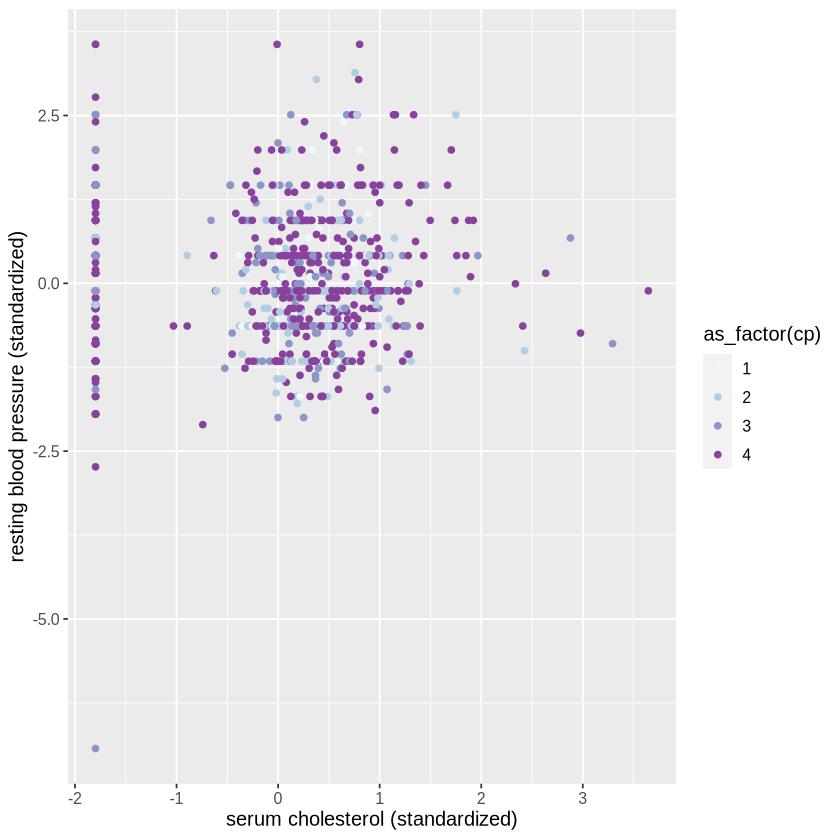

In [13]:
cp_plot <- scaled_cp |>
ggplot(aes(x= chol, 
           y= trestbps, 
           color= as_factor(cp)))+
geom_point()+
xlab("serum cholesterol (standardized)")+
ylab("resting blood pressure (standardized)")+
theme(text = element_text(size = 12))+
scale_color_brewer(palette = "BuPu")

cp_plot

      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     12 chol: serum cholestoral in mg/dl
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     32 thalach: maximum heart rate achieved
     38 exang: exercise induced angina (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     44 ca: number of major vessels (0-3) colored by flourosopy
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

9. Missing Attribute Values: Several.  Distinguished with value -9.0.

In [ ]:
#switzerland$sex_changed <- ifelse(switzerland$sex == 1, "male", "female")
#switzerland